In [1]:
# import all important libraries
import pandas as pd
from mplsoccer.pitch import Pitch


In [6]:
# read the csv file
df = pd.read_csv('data.csv')

# filter the data frame
df = df[df['teamId'] == 'Barcelona']
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

passes = df[df['type'] == 'Pass']
successful = passes[passes['outcome'] == 'Successful']
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [8]:
subs = df[ df['type'] == 'SubstitutionOff' ]
subs = subs['minute']
firstSub = subs.min()
successful = successful[successful['minute'] < firstSub]
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [10]:
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec
successful

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_14840/2399287847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_14840/2399287847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [13]:
average_locations = successful.groupby('passer').agg({'x' : ['mean'] , 'y' : ['mean','count']})
average_locations.columns = ['x','y','count']
average_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


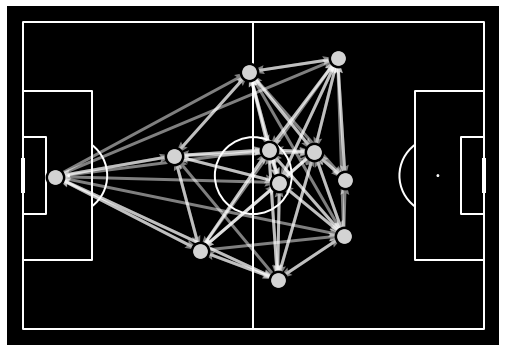

In [28]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between = pass_between.merge(average_locations,left_on='passer',right_index = True)
pass_between = pass_between.merge(average_locations,left_on='recipient',right_index = True,suffixes=['','_end'])
pass_between = pass_between[pass_between['pass_count'] > 1]

pitch = Pitch()
pitch = Pitch(pitch_color='Black', line_color='white')
fig, ax = pitch.draw(figsize=(10, 5))
arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,ax=ax,width=3,headwidth=3,color='white',zorder=1,alpha=0.5)
nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=300,color='#d3d3d3',edgecolors='black',linewidth=2.5,alpha=1,zorder=1,ax=ax)